# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [97]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 0. Business Questions 

We will try to Answer questions that are mentioned below:

1. How much we loss because of the offers?
2. What kind of customers that often completed the offer without viewing it?
3. How is the income distributes between customers type?

Lets start some data cleaning and visulaization, and bring it in the form where we will be able to answer these questions.|

## 1. Data Analysis and Cleaning

#### Lets get some insights into first daaframe portfolio: containing offer ids and meta data about each offer (duration, type, etc.)

In [69]:
portfolio

,difficulty,duration,id,offer_type,reward,email,web,social,mobile
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,0,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [3]:
# portfolio has no mjkssing or nan values
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [103]:
# portfolio has only 10 rows  but first column has much information compressed for channel, will need to hot encode this

portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [5]:
zeros = [0 for i in range(0,10)]


In [6]:
zeros = [0 for i in range(0,10)]
encode_channel= pd.DataFrame({'email': zeros, 'web': zeros, 'social': zeros,'mobile': zeros})


In [7]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [8]:
for index, value in portfolio.iterrows():
    for item in value['channels']:
        if item == 'email':
            encode_channel['email'][index]=1
        elif item == 'web':
            encode_channel['web'][index]=1
        elif item == 'social':
            encode_channel['social'][index]=1
        else:
            encode_channel['mobile'][index]=1
encode_channel
        
        
        

,email,web,social,mobile
0,1,0,1,1
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,0
5,1,1,1,1
6,1,1,1,1
7,1,0,1,1
8,1,1,1,1
9,1,1,0,1


In [9]:
portfolio.drop(['channels'],axis=1, inplace=True)

In [10]:
portfolio = pd.concat([portfolio, encode_channel], axis= 1)

In [11]:
portfolio

,difficulty,duration,id,offer_type,reward,email,web,social,mobile
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,0,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


#### Lets get some insights into second daaframe profile: demographic data for each customer



In [12]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [13]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [14]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [15]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [16]:
profile.isna().sum()*1.0/len(profile)
## profile dataframe has 2 columns age and gender with 2175 missing values which is around 13 percent of total values

age                 0.000000
became_member_on    0.000000
gender              0.127941
id                  0.000000
income              0.127941
dtype: float64

In [17]:
# gender distribtion
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

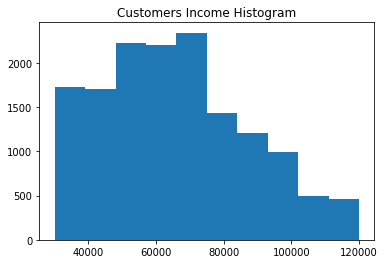

In [18]:
# income distribution
plt.hist(profile['income'].dropna())
plt.title('Customers Income Histogram')
plt.show()

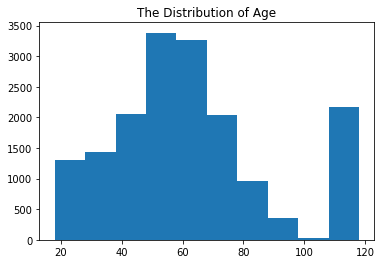

In [19]:
# age distribution
plt.hist(profile['age'].dropna())
plt.title('The Distribution of Age')
plt.show()
# most number of values are distributed between 40-60, also 
#many values present for the age closer to 120, will have investigate this more

In [20]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [21]:
profile.head(50)

,age,became_member_on,gender,id,income
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,2017-09-25,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,2017-10-02,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,2016-11-22,None,8974fc5686fe429db53ddde067b88302,NaN


In [22]:
profile['age'].mode()
# cannot replaced by mode

0    118
dtype: int64

In [47]:
profile['age'].median();
#median seems suitable

In [24]:
profile['difference_days'] = (profile['became_member_on'].max() - profile['became_member_on']).dt.days

median_age_per_day = profile.groupby('became_member_on', as_index=False)['age'].median()

median_income_per_day = profile.groupby('became_member_on', as_index=False)['income'].median()

mode_gender_per_day = profile.groupby('became_member_on')['gender'].agg(lambda x: pd.Series.mode(x))
mode_gender_per_day_value = [i if isinstance(i, str) else 'M' for i in mode_gender_per_day]

age_reference = dict(zip(median_age_per_day['became_member_on'], median_age_per_day['age']))
profile['age'] = profile['age'].replace({118: None, 101: None}).fillna(profile['became_member_on'].map(age_reference))
profile.loc[profile['age'] > 100, 'age'] = profile['age'].median()

gender_reference = dict(zip(mode_gender_per_day.index,mode_gender_per_day_value))
profile['gender'] = profile['gender'].fillna(profile['became_member_on'].map(gender_reference))

income_reference = dict(zip(median_income_per_day['became_member_on'], median_income_per_day['income']))
profile['income'] = profile['income'].fillna(profile['became_member_on'].map(income_reference))
profile['income'].fillna(profile['income'].median(), inplace=True)

profile['age'] = profile['age'].astype(int)

#### Lets get some insights into third daaframe transcript: records for transactions, offers received, offers viewed, and offers completed

In [25]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [26]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [27]:

transcript.isna().sum()*1.0/len(transcript)
## profile dataframe has 2 columns age and gender with 0 missing values 

event     0.0
person    0.0
time      0.0
value     0.0
dtype: float64

In [28]:
transcript.sample(20)

,event,person,time,value
194061,transaction,bfbb2bd21f3c41488c7f80b70abffaab,474,{'amount': 1.23}
56477,offer received,48f7bc851d79485aba255b24325f4649,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
288955,transaction,989f334a4cff440786166cb2d46cbfa6,642,{'amount': 29.48}
64898,offer received,53519ac74bfa4caebaca6e2b47b86e2e,168,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
74142,offer viewed,bb78f4ec254e4eea8c31c85fa08e6ecb,180,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
38522,transaction,7729cff13e7e48689ca9333265497ff1,84,{'amount': 21.72}
3868,offer received,2dbab8bd18a340eea8fe57fc492d6bdd,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
301120,transaction,5328aad35dd747da9dd21c31b137069c,690,{'amount': 2.21}
66751,transaction,d41e89f8d3ab4260ae3773e64f473d7a,168,{'amount': 2.98}
80344,offer completed,b23f03652b9f475eada633abb8d4eb67,198,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...


In [29]:
profile.duplicated().sum()

0

In [30]:
transcript.columns

Index(['event', 'person', 'time', 'value'], dtype='object')

In [31]:
transcript[['event', 'person', 'time']].duplicated().sum()

2962

In [32]:
extract = pd.io.json.json_normalize(transcript['value'])

In [33]:
extract.head()

,amount,offer id,offer_id,reward
0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [34]:
extract['offer_id']= np.where(pd.isnull(extract['offer_id']), extract['offer id'], extract['offer_id'])

In [35]:
extract.drop('offer id', inplace=True, axis=1)

In [36]:
extract.head()

,amount,offer_id,reward
0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [37]:
transcript.shape

(306534, 4)

In [38]:
extract.shape

(306534, 3)

In [39]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [40]:
transcript.drop('value', axis=1);

In [41]:
transcript= pd.concat([transcript, extract], axis=1)

In [42]:
transcript.head()

,event,person,time,value,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [43]:
transcript.shape

(306534, 7)

It appears values which are not present could be replaced by 0 as for that datapoint no voucher or offer was given


In [45]:
transcript.fillna(0, inplace=True)

transcript.head()

,event,person,time,value,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0


### Lets combine all the data




#### The merged dataframe will have these columns:

1. customer unique id, 
2. offer_id:offer id, 
3. viewed: did customer see the offer? 0: no and 1: yes,
4. completed: did customer completed the offer? 0: no and 1: yes,
5. view_information: shows whether the customer saw the informational offer or not,
6. time_completed: how long the customer need for completing the offer,
7. reward: reward of that specific offer,
8. offer_type: type of offer


In [50]:
offer_reference = {}

for i,j in zip(portfolio['id'], portfolio['offer_type']):
    offer_reference[i] = j
    

offer_duration_reference = {}

for i,j in zip(portfolio['id'], portfolio['duration']):
    offer_duration_reference[i] = j*24
    


In [54]:
transcript['person']

0         78afa995795e4d85b5d9ceeca43f5fef
1         a03223e636434f42ac4c3df47e8bac43
2         e2127556f4f64592b11af22de27a7932
3         8ec6ce2a7e7949b1bf142def7d0e0586
4         68617ca6246f4fbc85e91a2a49552598
5         389bc3fa690240e798340f5a15918d5c
6         c4863c7985cf408faee930f111475da3
7         2eeac8d8feae4a8cad5a6af0499a211d
8         aa4862eba776480b8bb9c68455b8c2e1
9         31dda685af34476cad5bc968bdb01c53
10        744d603ef08c4f33af5a61c8c7628d1c
11        3d02345581554e81b7b289ab5e288078
12        4b0da7e80e5945209a1fdddfe813dbe0
13        c27e0d6ab72c455a8bb66d980963de60
14        d53717f5400c4e84affdaeda9dd926b3
15        f806632c011441378d4646567f357a21
16        d058f73bf8674a26a95227db098147b1
17        65aba5c617294649aeb624da249e1ee5
18        ebe7ef46ea6f4963a7dd49f501b26779
19        1e9420836d554513ab90eba98552d0a9
20        868317b9be554cb18e50bc68484749a2
21        f082d80f0aac47a99173ba8ef8fc1909
22        102e9454054946fda62242d2e176fdce
23        4

In [77]:
!pip install tqdm pandasql;

In [55]:
full_data = []
persons= list(transcript['person'].unique())
# Iterate through each person
for person in persons:
    
    not_completed = {}
    received = []
    active = []
    total_data = {}
    information = []

    for index, row in transcript[transcript['person'] == person].iterrows():

        if row['event'] == 'offer received':

            # Everytime there is an offer received, do this
            received.append(row['offer_id'])
            key = row['offer_id'] + '-' + str(received.count(row['offer_id']))
            not_completed[key] = row['time']
            total_data[key] = [row['person'], row['offer_id'], 0, 0, 0, 0] 


        if row['event'] == 'offer viewed':

            # If the customers have seen the informational offer
            if offer_reference[row['offer_id']] == 'informational':
                information.append(row['offer_id'])

            # Everytime the offer is viewed, do this
            active = list(filter(lambda x: x.split('-')[0] == row['offer_id'], list(not_completed.keys())))

            # If there is only one offer_id active
            if len(active) == 1:

                # Only change the value if the offer is not completed yet
                if active[0] in not_completed:                    
                    total_data[active[0]][2] = 1

            # If there are more than one offer_id active
            else:
                for offer_id in active:
                    if (row['time'] - not_completed[offer_id]) < offer_duration_reference[row['offer_id']]:
                        if total_data[offer_id][2] == 1:
                            continue
                        total_data[offer_id][2] = 1
                        break


        if row['event'] == 'offer completed':

            # If the users completed the offer and have seen the informational offer
            info = False
            if len(information) > 0:
                info = True

            # Everytime the offer is completed, do this
            active = list(filter(lambda x: x.split('-')[0] == row['offer_id'], list(not_completed.keys())))

            # If there is only one offer_id active
            if len(active) == 1:
                total_data[active[0]][3] = 1
                total_data[active[0]][5] = row['time'] - not_completed[active[0]]
                not_completed.pop(active[0])

                if info:
                    total_data[active[0]][4] = 1

                continue

            # If there is more that one offer_id active
            else:
                for offer_id in active:
                    if (row['time'] - not_completed[offer_id]) < offer_duration_reference[row['offer_id']]:
                        total_data[offer_id][3] = 1
                        total_data[offer_id][5] = row['time'] - not_completed[offer_id]
                        not_completed.pop(offer_id)

                        if info:
                            total_data[offer_id][4] = 1

                        break

    for index, value in total_data.items():
        full_data += [value]


In [57]:
merged_data = pd.DataFrame(full_data, columns=['person', 'offer_id', 'viewed', 'completed', 'view_information', 'time_completed'])

merged_data.head()
merged_data = merged_data.merge(portfolio, left_on='offer_id', right_on='id').drop(columns=['id'])
merged_data = merged_data.merge(profile, left_on='person', right_on='id').drop(columns=['id'])

merged_data.head()

,person,offer_id,viewed,completed,view_information,time_completed,difficulty,duration,offer_type,reward,email,web,social,mobile,age,became_member_on,gender,income,difference_days
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,132,5,7,bogo,5,1,1,0,1,75,2017-05-09,F,100000.0,443
1,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,1,0,0,0,0,3,informational,0,1,0,1,1,75,2017-05-09,F,100000.0,443
2,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,102,10,7,bogo,10,1,0,1,1,75,2017-05-09,F,100000.0,443
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,0,1,1,6,5,5,bogo,5,1,1,1,1,75,2017-05-09,F,100000.0,443
4,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,114,5,7,bogo,5,1,1,0,1,68,2018-04-26,M,70000.0,91


## 2. Answers to the Questions

### I. How much was the loss because of offers?
Each data point row represents each offer sent to each user. 
Column viewed means whether the offer has been viewed by the customers or not.

In [61]:
merged_data[(merged_data['viewed'] == 0) & (merged_data['completed'] == 1)]['reward'].sum()

49032

In [ ]:
!pip install tqdm pandasql

Company lost" USD 49,032 in revenue. 
If we take a look at column time in dataframe transcript, we can get maximum value of 714.

With that being said, on average company has a potential loss of 49,032 x 12 = USD 588,384 of revenue in a year taking into account s the maximum experiment time is 714 hours = 30 days, so we can assume that the experiment is running for 30 days or a month. 

In [68]:
import pandasql as pdsql
query = """
        SELECT
            complete.offer_id,
            complete.offer_type,
            total_completed,
            total_completed_without_view,
            ROUND(((1.0*total_completed_without_view) / (1.0*total_completed))*100, 2) as total_completed_without_view_ratio,
            100 - ROUND(((1.0*total_completed_without_view) / (1.0*total_completed))*100, 2) as total_completed_with_view_ratio,
            `loss ($)`
        FROM
            (SELECT
                offer_id,
                offer_type,
                COUNT(*) AS total_completed
            FROM
                merged_data
            WHERE
                completed = 1
            GROUP BY
                offer_id) complete
                
        JOIN
            (SELECT
                offer_id,
                offer_type,
                COUNT(*) AS total_completed_without_view,
                SUM(reward) AS `loss ($)`
            FROM
                merged_data
            WHERE
                viewed = 0
                AND completed = 1
            GROUP BY
                offer_id) complete_not_view ON complete.offer_id = complete_not_view.offer_id
                
        ORDER BY
            total_completed_without_view_ratio DESC
        """

completed_without_view = pdsql.sqldf(query)

completed_without_view

,offer_id,offer_type,total_completed,total_completed_without_view,total_completed_without_view_ratio,total_completed_with_view_ratio,loss ($)
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,3418,2086,61.03,38.97,10430
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,4351,2231,51.28,48.72,11155
2,2906b810c7d4411798c6938adc9daaa5,discount,4013,1890,47.10,52.90,3780
3,ae264e3637204a6fb9bb56bc8210ddfd,bogo,3687,1068,28.97,71.03,10680
4,f19421c1d4aa40978ebb69ca19b0e20d,bogo,4287,755,17.61,82.39,3775
5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,3323,562,16.91,83.09,5620
6,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,5148,762,14.80,85.20,2286
7,fafdcd668e3743c1bb461111dcafc2a4,discount,5315,653,12.29,87.71,1306


In [70]:
table = completed_without_view.groupby('offer_type', as_index=False) \
                              .agg({'loss ($)': ['sum'],
                                    'total_completed_without_view': ['sum']})

table.columns = [' '.join(col).strip() for col in table.columns.values]

table

,offer_type,loss ($) sum,total_completed_without_view sum
0,bogo,31230,4616
1,discount,17802,5391


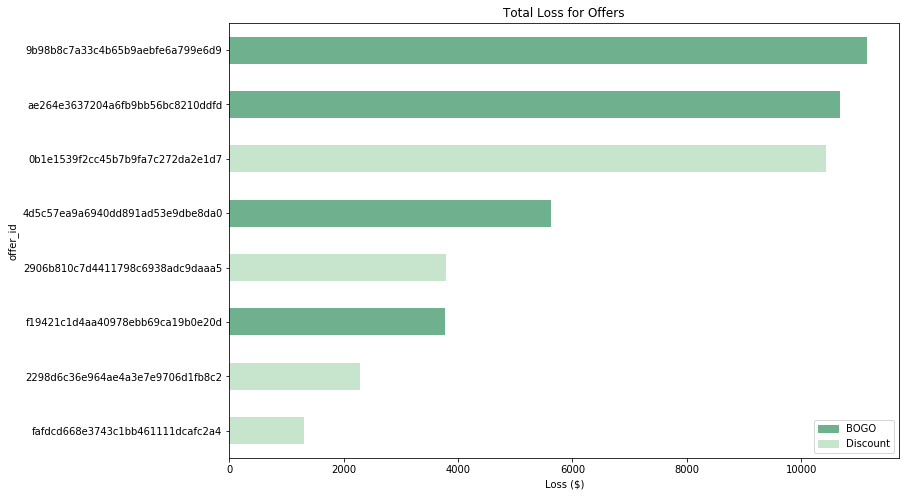

In [101]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
viz = completed_without_view[['offer_id', 'loss ($)', 'offer_type']].set_index('offer_id') \
                                                                    .sort_values('loss ($)')

colors = tuple(np.where(viz['offer_type'] == 'discount', '#C6E5CC', '#6fb08e'))

viz['loss ($)'].plot(kind='barh',
                     color=colors,
                     figsize=(12,8))

discount = mpatches.Patch(color='#C6E5CC', label='Discount')
bogo = mpatches.Patch(color='#6fb08e', label='BOGO')

plt.legend(handles=[bogo, discount])
plt.title('Total Loss for Offers')
plt.xlabel('Loss ($)')
plt.show()

Discount
Total: 5,391
Loss: USD 17,802

BOGO
Total: 4,616
Loss: USD 31,230

There are 8 offers, and most of the loss are from BOGO offer.


### II. Which customers have tendency to complete offer without viewing it?

Is there any difference in behaviour between Male, Female, and Others?

In [79]:
query = """
SELECT
            complete.offer_type,
            complete.gender,
            complete.complete_without_view,
            complete_view.complete_with_view,
            (complete.complete_without_view + complete_view.complete_with_view) total_complete
            
        FROM
            (SELECT
                offer_type,
                gender,
                COUNT(*) complete_without_view
            FROM
                merged_data
            WHERE
                viewed = 0
                AND completed = 1
            GROUP BY
                offer_type, gender) complete
        
        JOIN
            (SELECT
                offer_type,
                gender,
                COUNT(*) complete_with_view
            FROM
                merged_data
            WHERE
                viewed = 1
                AND completed = 1
            GROUP BY
                offer_type, gender) complete_view ON complete.offer_type = complete_view.offer_type
                                                     AND complete.gender = complete_view.gender
        """

user_demographic_summary = pdsql.sqldf(query)

user_demographic_summary['complete_without_view_ratio'] = round((user_demographic_summary['complete_without_view'] / user_demographic_summary['total_complete']) * 100, 2)
user_demographic_summary['complete_with_view_ratio'] = round((user_demographic_summary['complete_with_view'] / user_demographic_summary['total_complete']) * 100, 2)

user_demographic_summary['gender'] = user_demographic_summary['gender'].map({'F': 'Female', 'M': 'Male', 'O': 'Others'})

user_demographic_summary

,offer_type,gender,complete_without_view,complete_with_view,total_complete,complete_without_view_ratio,complete_with_view_ratio
0,bogo,Female,2267,5366,7633,29.70,70.30
1,bogo,Male,2296,5475,7771,29.55,70.45
2,bogo,Others,53,191,244,21.72,78.28
3,discount,Female,2743,5471,8214,33.39,66.61
4,discount,Male,2592,6832,9424,27.50,72.50
5,discount,Others,56,200,256,21.88,78.12


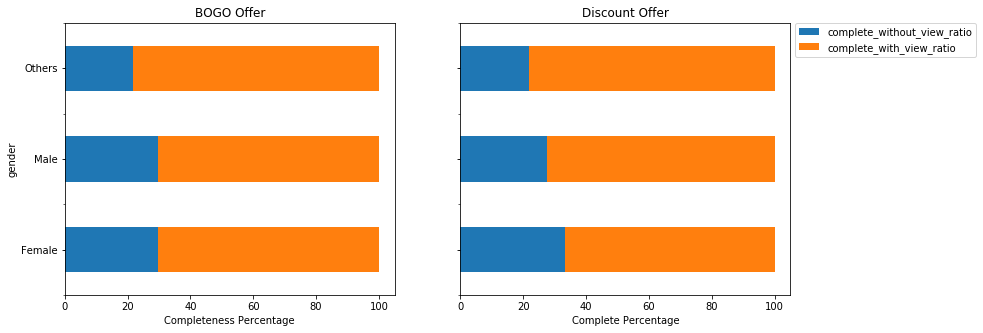

In [82]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

ax.title.set_text('BOGO Offer')
ax.set_xlabel('Completeness Percentage')
user_demographic_summary[user_demographic_summary['offer_type'] == 'bogo'] \
                        [['gender', 'complete_without_view_ratio', 'complete_with_view_ratio']] \
                        .set_index('gender') \
                        .plot(kind='barh',
                              legend=False,
                              stacked=True,
                            
                              figsize=(13,5),
                              ax=ax)


ax2.title.set_text('Discount Offer')
ax2.set_xlabel('Complete Percentage')
user_demographic_summary[user_demographic_summary['offer_type'] == 'discount'] \
                        [['gender', 'complete_without_view_ratio', 'complete_with_view_ratio']] \
                        .set_index('gender') \
                        .plot(kind='barh',
                              stacked=True,
                            
                              figsize=(13,5),
                              ax=ax2)

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.show()

This visualization shows the percentages customers who complete the offer with and without viewing the offer.

As we can see, in the BOGO Offer there is not much differencess between Male and Female, but in the Discount Offer we can see that Female has slightly higher ratio than Male and Others, with 33.4% compared to 27.5% and 21.9% respectively.

It indicates that the Female tends to be less "discount-driven" than Male and Others.

In [83]:
avg_spending = transcript[transcript['event'] == 'transaction'].merge(profile, left_on='person', right_on='id') \
                                                               .groupby('gender', as_index=False)['amount'] \
                                                               .mean() \
                                                               .rename(columns={'amount': 'average_spending_per_transaction'}) \
                                                               .sort_values('average_spending_per_transaction')

avg_spending['gender'] = avg_spending['gender'].map({'F': 'Female', 'M': 'Male', 'O': 'Others'})

avg_spending

,gender,average_spending_per_transaction
1,Male,10.459836
2,Others,14.798731
0,Female,16.309540


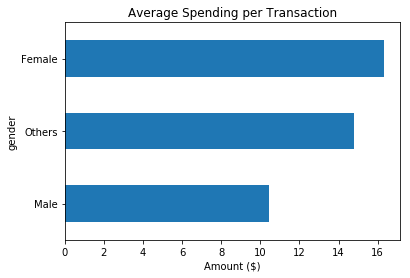

In [84]:
avg_spending.set_index('gender').plot(kind='barh', legend=False)
plt.title('Average Spending per Transaction')
plt.xlabel('Amount ($)')
plt.show()

The visualization also confirms our previous assumption about Female customers, it shows that the average spending per transaction for Female is higher than Male and Others, with the average of USD 16,3 per transaction.

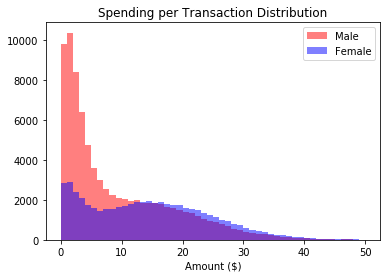

In [93]:
spending_distribution = transcript[transcript['event'] == 'transaction'].merge(profile, left_on='person', right_on='id')
fig = plt.Figure(figsize=(w, h))
plt.hist(spending_distribution[spending_distribution['gender'] == 'M']['amount'], range=(0, 50), alpha=0.5, bins=50, label='Male', color= 'r')
plt.hist(spending_distribution[spending_distribution['gender'] == 'F']['amount'], range=(0, 50), alpha=0.5, bins=50, label='Female', color='b')
plt.legend(loc='upper right')

plt.title('Spending per Transaction Distribution')
plt.xlabel('Amount ($)')
plt.show()

The spending distribution of each gender also shows that most of the Male customers tend to spend less money, where Female customers seems balanced in all the population.

### III. Relation between average income and customers type

In [95]:
query= """
SELECT
            complete.offer_type,
            complete.complete_without_view_income,
            complete_view.complete_with_view_income
            
        FROM
            (SELECT
                offer_type,
                AVG(income) complete_without_view_income
            FROM
                merged_data
            WHERE
                viewed = 0
                AND completed = 1
            GROUP BY
                offer_type) complete
        
        JOIN
            (SELECT
                offer_type,
                AVG(income) complete_with_view_income
            FROM
                merged_data
            WHERE
                viewed = 1
                AND completed = 1
            GROUP BY
                offer_type) complete_view ON complete.offer_type = complete_view.offer_type
        """

income_differences = pdsql.sqldf(query)

income_differences

,offer_type,complete_without_view_income,complete_with_view_income
0,bogo,70425.151646,69999.592096
1,discount,71060.842144,67642.805727


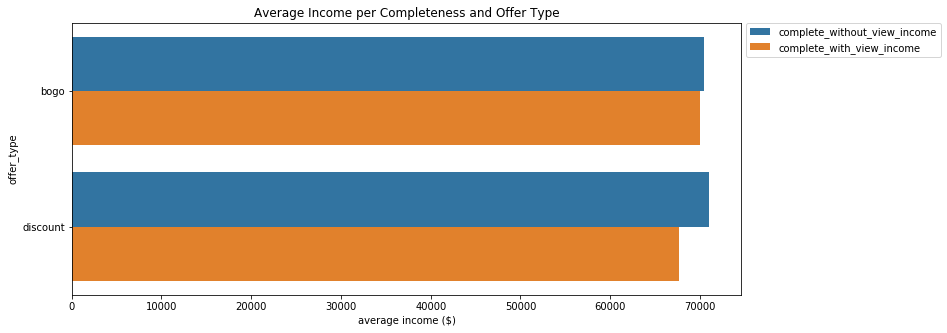

In [96]:
plt.figure(figsize=(12,5))

sns.barplot(data=income_differences.melt(id_vars='offer_type'), 
            y='offer_type', 
            x='value', 
            hue='variable'
            )

plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.title('Average Income per Completeness and Offer Type')
plt.xlabel('average income ($)')
plt.show()

If we take a look at the visualization, there is not much differences between customers who complete the offer without viewing it or not. But overall, customers who complete the offer without viewing the offer first have the higher average income.

It is quite intuitive because we always assume people who have higher income care less about the offer (well, they have more money anyway so they can afford it).

###  3. Conclusion
Based on the analysis, there are several things we can conclude.

1. With the unplanned offer, we can "loss" up to USD 49,032 of revenue in a month or USD 588,384 of revenue in a year. So the target marketing of our promo is very important and plays a huge roll.

2. Female customers tend to spend more than Male customers, with the average spending per transaction is USD 16,3 compared to USD 10,4 respectively. Female customers also have tendency to complete the offer even without viewing it first, so we might want to be more careful in sending the offer to them.

3. In overall, customers who complete the offer without viewing the offer first have the higher average income, especially in discount offer where those who complete the offer without viewing it and those who viewed it have average income USD 71,060 and USD 67,642 respectively.

###  4. Future Improvements
These are the things I recommend for future work based on the data analysis result:

1. We need to be more careful in sending the offer, especially the BOGO offer where it contributes USD 31,230 loss in this experiment. One thing we can do is to stop giving the BOGO offer to the customers with the average purchase > 2 cups per transaction, because without giving them the offer they tend to purchase > 2 cups anyway so the BOGO offer seems not to important for them.

2. Send less offer to the Female customers, especially discount offer. We can see from the data that the average spending of Female customers is USD 16,3. So we might want to increase the minimum spending for the offer we send to them, because it won't make sense if we send them the offer with "difficulty" of USD 10, they would accomplish it anyway. So increase the minimum purchase to USD 20 or USD 25 would be better.

3. We might want to customize the "difficulty" based on the level of income for each customer, so that people with the higher income have the higher "difficulty" as well.